<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/F_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install japanize-matplotlib
#import japanize-matplotlib

In [3]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


F分布の生成

In [0]:
import itertools
from scipy import stats
l=range(3,30,8)
F=pd.DataFrame()
x=np.linspace(0,5,100)
for v in itertools.combinations(l, 2):
    F[str(v)] = stats.f.pdf(x,v[0],v[1])


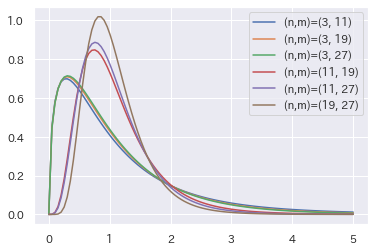

In [5]:
for col in F.columns:
    plt.plot(x,F[col], label="(n,m)="+col)
    plt.legend()
plt.savefig("Fdsb.png")

# 分散分析

In [0]:
np.random.seed(0)

データの生成

In [0]:
df=pd.DataFrame()
df["条件1"] = np.random.normal(loc=1,scale=1,size=30)
df["条件2"] = np.random.normal(loc=0,scale=1,size=30)

グラフの描画

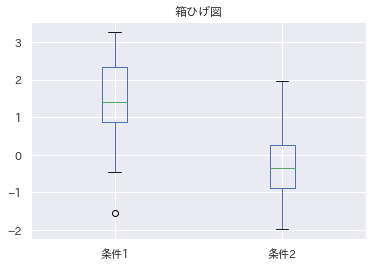

In [8]:
df.plot.box()
plt.title("箱ひげ図")
plt.savefig("boxplot.png")

平均と変動の計算

In [0]:
mu1 = df.条件1.mean()
mu2 = df.条件2.mean()
X= np.append(df.条件1,df.条件2)
mu = np.mean(X)

In [10]:
print(mu1)
print(mu2)
print(mu)

1.442856447263175
-0.2895218561539811
0.5766672955545967


In [0]:
S_R = len(df.条件1)*(mu1-mu)**2 +len(df.条件2)* (mu2 - mu)**2
S_E = np.sum((df.条件1 -mu1)**2 ) + np.sum((df.条件2 -mu2)**2 )

In [12]:
print(S_R)
print(S_E)

45.017018792257566
59.35008558312645


自由度と分散、F値の計算

In [0]:
f_R =1
f_E = len(X)-f_R -1
V_R = S_R/f_R
V_E = S_E/f_E

In [14]:
print(V_R)
print(V_E)

45.017018792257566
1.0232773376401112


In [15]:
F=V_R/V_E
print(F)

43.992979357948165


p値の計算

In [16]:
p_value = stats.f.sf(F,f_R, f_E)
print(p_value)

1.209867400391656e-08
